In [80]:
library(stringr)
library(ggplot2)
library(dplyr)
library(reshape2)

In [81]:
cutoffs = readRDS("/Users/shayecarver/condPCA/ASHG/Morabito/BIC/BIC_elbow_cutoffs_df.rds")
labels = str_split_fixed(cutoffs$Dataframe, "_", 3)[,1:2]
colnames(labels) = c("data_type","Method")
cutoffs = cbind(cutoffs, labels)

In [82]:
head(cutoffs)

,Dataframe,BIC,Elbow,data_type,Method
,<glue>,<int>,<dbl>,<chr>,<chr>
1,RNA_Standard_PCA,74,16,RNA,Standard
2,RNA_Conditional_PCA,76,12,RNA,Conditional
3,RNA_ODC,41,9,RNA,ODC
4,RNA_MG,14,5,RNA,MG
5,RNA_OPC,10,9,RNA,OPC
6,RNA_INH,30,16,RNA,INH


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


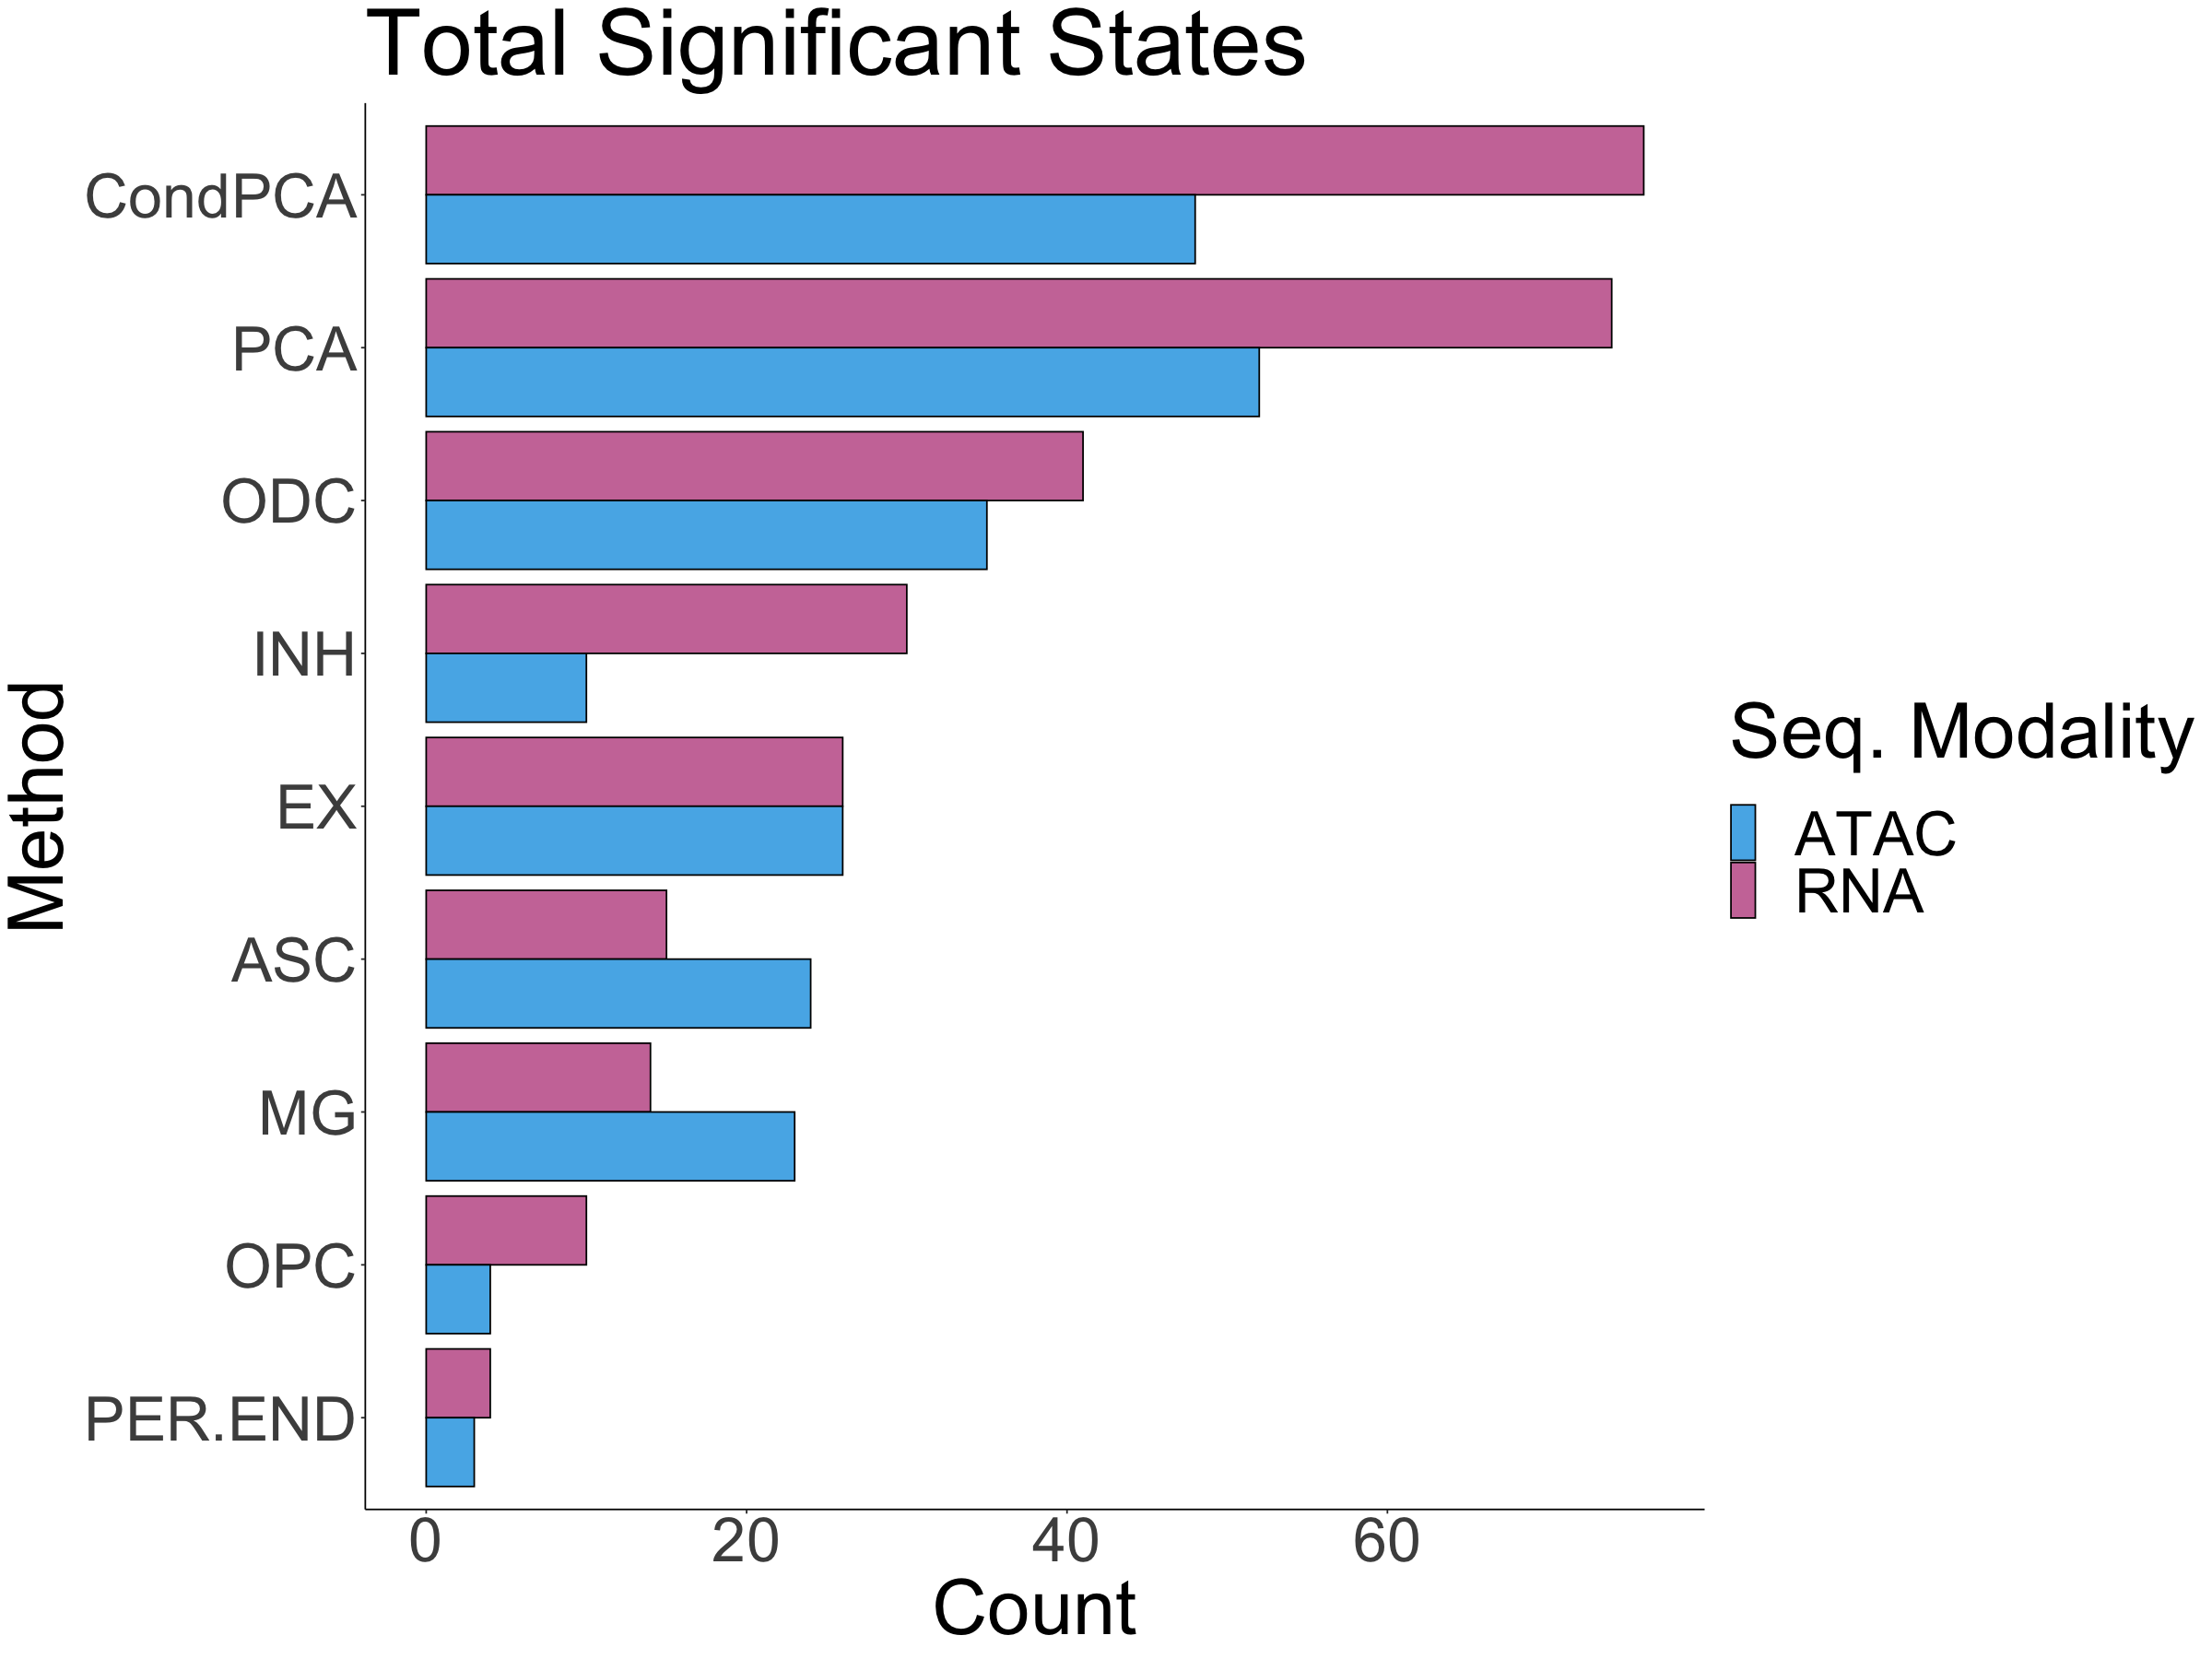

In [83]:
# BASED ON BIC CUTOFF
cutoffs[cutoffs$Method == "Conditional",]$Method = "CondPCA"
cutoffs[cutoffs$Method == "Standard",]$Method = "PCA"
order_method = arrange(cutoffs[cutoffs$data_type == "RNA",], BIC )$Method
#order_method = arrange(cutoffs[cutoffs$BIC_ELBOW == "BIC",], PC )$Method
cutoffs$Method = factor(cutoffs$Method, levels = order_method)
options(repr.plot.width = 20, repr.plot.height = 15)
# ggplot(cutoffs,                                      # Grouped barplot using ggplot2
#        aes(x = Method,
#            y = BIC,
#            fill = data_type) ) +
#   geom_bar(stat = "identity",color="black",
#            position = "dodge")+theme_bw()+coord_flip()+ labs(y = "Count", x = "Method")+ scale_fill_discrete(name = "Data Type") + ggtitle('Total Significant States')+ theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20), text = element_text(size = 15), axis.text = element_text(size = 12),axis.title = element_text(size = 17),plot.title = element_text(hjust = 0.5, size = 20),legend.text=element_text(size=15))+ theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),text = element_text(size = 15), axis.text = element_text(size = 12),axis.title = element_text(size = 17),plot.title = element_text(hjust = 0.5, size = 20),legend.text=element_text(size=15)) + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
# panel.background = element_blank(), axis.line = element_line(colour = "black"))+scale_fill_manual(values=c("#56B4E9", "#CC79A7"))+theme(text = element_text(size=20))+labs(fill="Seq. Modality")
ggplot(cutoffs,                                      # Grouped barplot using ggplot2
       aes(x = Method,
           y = BIC,
           fill = data_type) ) +
  geom_bar(stat = "identity",color="black",
           position = "dodge")+theme_bw()+coord_flip()+ labs(y = "Count", x = "Method")+ scale_fill_discrete(name = "Data Type") + ggtitle('Total Significant States')+theme_classic()+theme(text = element_text(size=20))+scale_fill_manual(values=c("#56B4E9", "#CC79A7"))+theme(text = element_text(size=50))+labs(fill="Seq. Modality")
#ggsave("BIC_cutoff.pdf",width=10, height=10)

In [ ]:
ATAC = cutoffs[cutoffs$data_type == "ATAC",]
ATAC = melt(ATAC, na.rm = FALSE, value.name = "PC", id = c("Dataframe","data_type","Method"), variable.name = "BIC_ELBOW")
ATAC$Method = as.character(ATAC$Method)
ATAC[ATAC$Method == "Conditional",]$Method = "CondPCA"
ATAC[ATAC$Method == "Standard",]$Method = "PCA"

order_method = arrange(ATAC[ATAC$BIC_ELBOW == "BIC",], PC )$Method
ATAC$Method = factor(ATAC$Method, levels = order_method)



options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(ATAC,                                      # Grouped barplot using ggplot2
       aes(x = Method,
           y = PC,
           fill = BIC_ELBOW) ) +
  geom_bar(stat = "identity",
           position = "dodge",color="black")+theme_bw()+coord_flip()+ labs(y = "Ascertained Cutoff", x = "Method")+ scale_fill_discrete(name = "Cutoff Method") + ggtitle('ATAC: State Cutoff Based on BIC vs Elbow')+ theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20), text = element_text(size = 15), axis.text = element_text(size = 12),axis.title = element_text(size = 17),plot.title = element_text(hjust = 0.5, size = 20),legend.text=element_text(size=15))+ theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),text = element_text(size = 15), axis.text = element_text(size = 12),axis.title = element_text(size = 17),plot.title = element_text(hjust = 0.5, size = 20),legend.text=element_text(size=15)) + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+scale_fill_manual(values=c("#56B4E9", "#CC79A7"))
#ggsave("BIC_vs_elbow_ATAC.pdf",width=10, height=10)

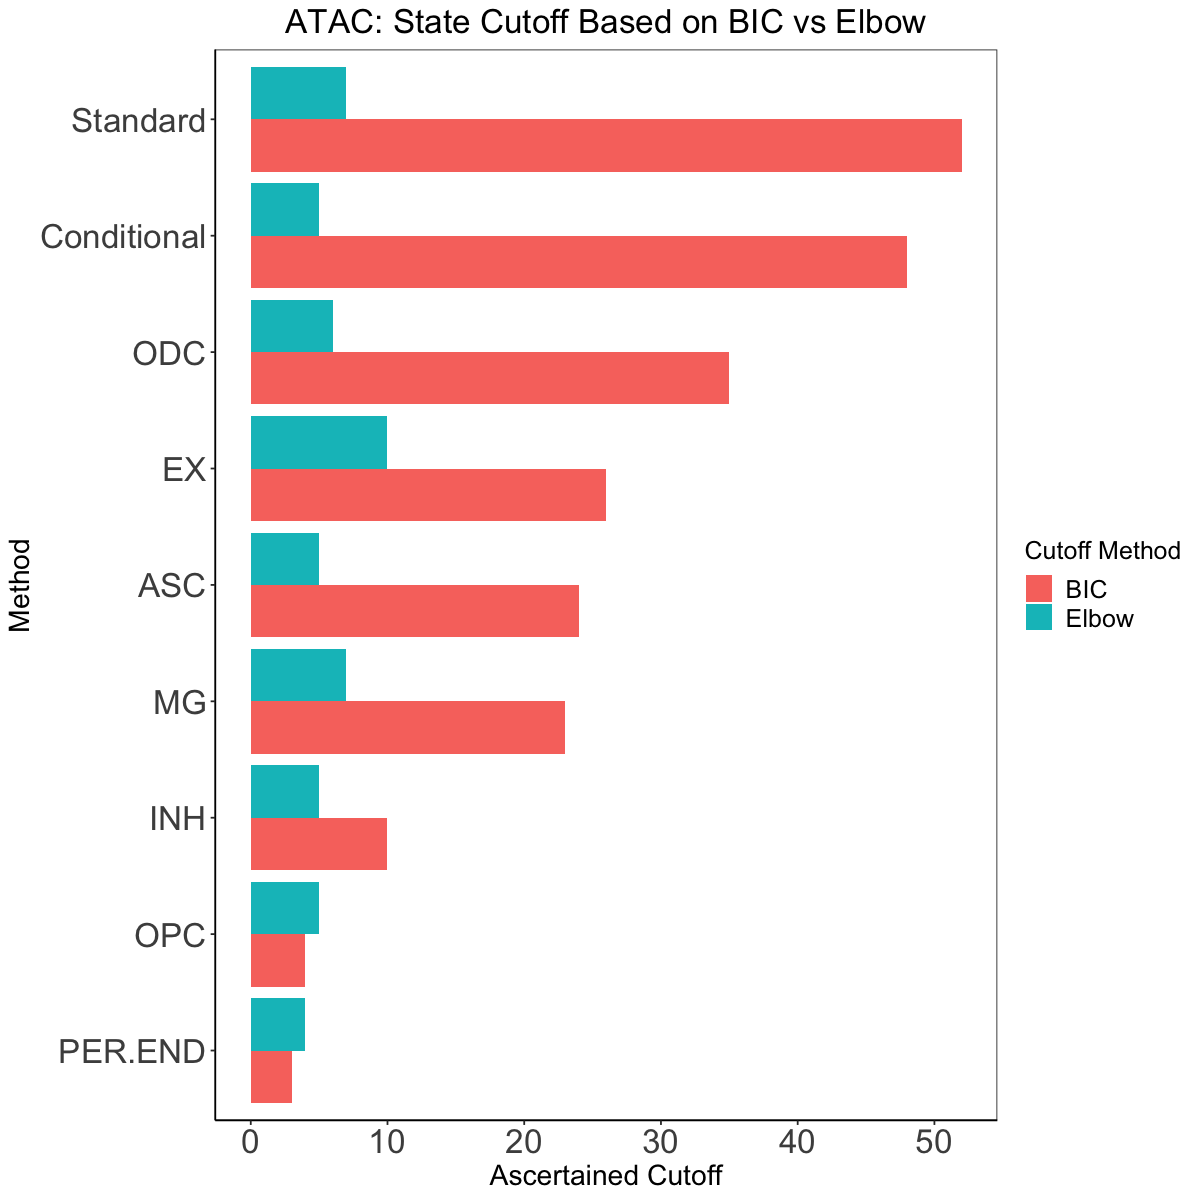

In [19]:
ATAC = cutoffs[cutoffs$data_type == "ATAC",]
ATAC = melt(ATAC, na.rm = FALSE, value.name = "PC", id = c("Dataframe","data_type","Method"), variable.name = "BIC_ELBOW")
order_method = arrange(ATAC[ATAC$BIC_ELBOW == "BIC",], PC )$Method
ATAC$Method = factor(ATAC$Method, levels = order_method)

options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(ATAC,                                      # Grouped barplot using ggplot2
       aes(x = Method,
           y = PC,
           fill = BIC_ELBOW) ) +
  geom_bar(stat = "identity",
           position = "dodge")+theme_bw()+coord_flip()+ labs(y = "Ascertained Cutoff", x = "Method")+ scale_fill_discrete(name = "Cutoff Method") + ggtitle('ATAC: State Cutoff Based on BIC vs Elbow')+ theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20), text = element_text(size = 15), axis.text = element_text(size = 12),axis.title = element_text(size = 17),plot.title = element_text(hjust = 0.5, size = 20),legend.text=element_text(size=15))+ theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),text = element_text(size = 15), axis.text = element_text(size = 12),axis.title = element_text(size = 17),plot.title = element_text(hjust = 0.5, size = 20),legend.text=element_text(size=15)) + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))
ggsave("BIC_vs_elbow_ATAC.pdf",width=10, height=10)

In [14]:
ATAC[ATAC$Method == "Conditional",]$Method

[1] Conditional Conditional
Levels: PER.END OPC INH MG ASC EX ODC Conditional Standard

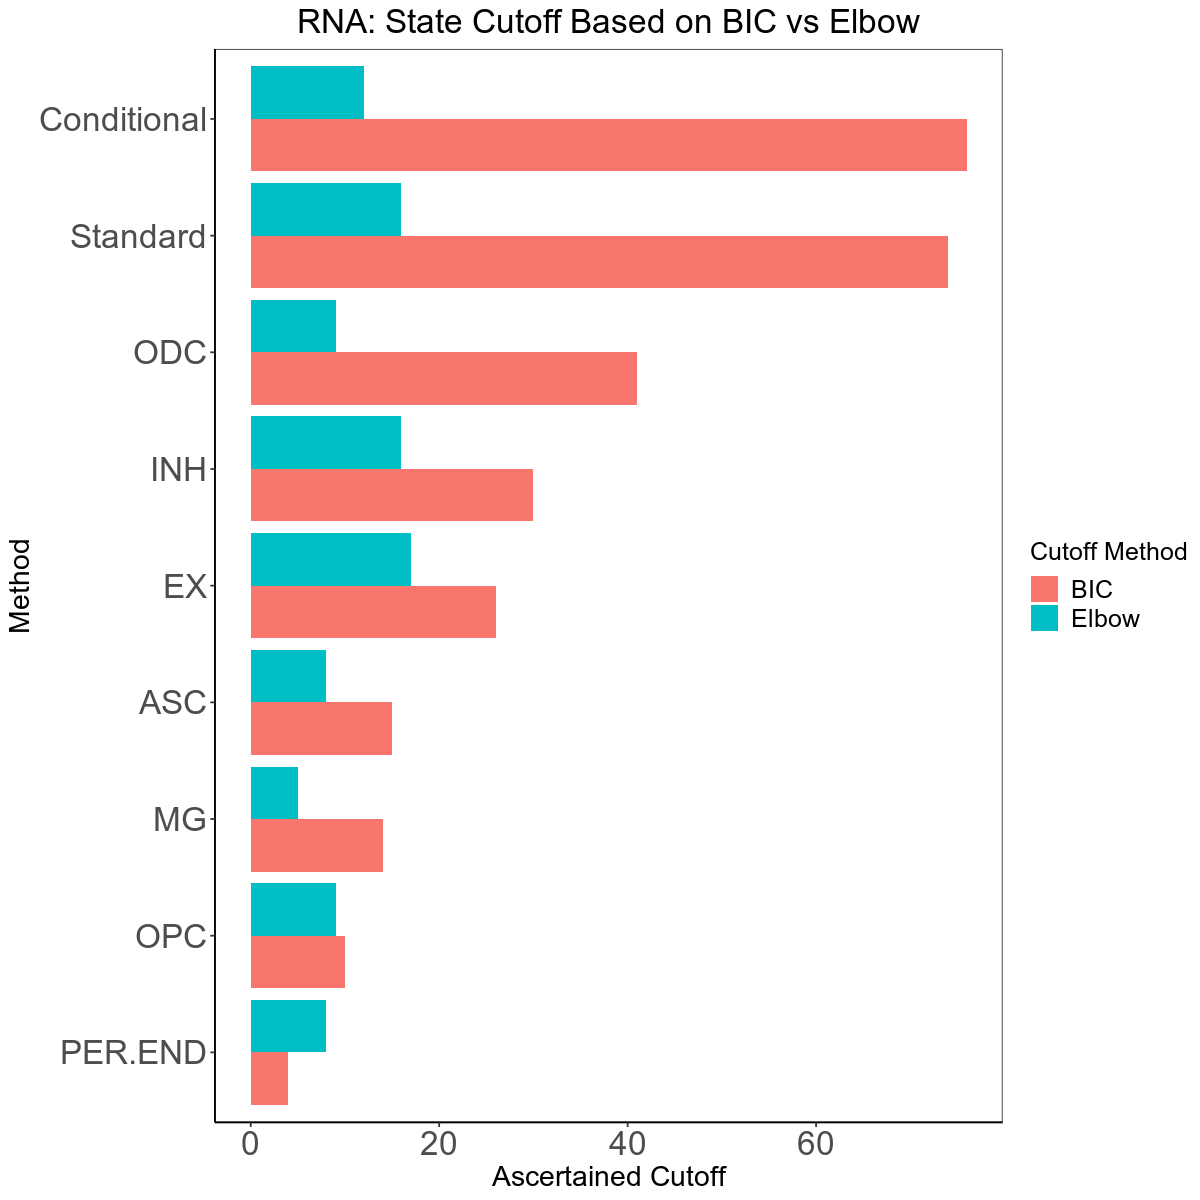

In [56]:
RNA = cutoffs[cutoffs$data_type == "RNA",]
RNA = melt(RNA, na.rm = FALSE, value.name = "PC", id = c("Dataframe","data_type","Method"), variable.name = "BIC_ELBOW")
order_method = arrange(RNA[RNA$BIC_ELBOW == "BIC",], PC )$Method
RNA$Method = factor(RNA$Method, levels = order_method)

options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(RNA,                                      # Grouped barplot using ggplot2
       aes(x = Method,
           y = PC,
           fill = BIC_ELBOW) ) +
  geom_bar(stat = "identity",
           position = "dodge")+theme_bw()+coord_flip()+ labs(y = "Ascertained Cutoff", x = "Method")+ scale_fill_discrete(name = "Cutoff Method") + ggtitle('RNA: State Cutoff Based on BIC vs Elbow')+ theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20), text = element_text(size = 15), axis.text = element_text(size = 12),axis.title = element_text(size = 17),plot.title = element_text(hjust = 0.5, size = 20),legend.text=element_text(size=15))+ theme(axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),text = element_text(size = 15), axis.text = element_text(size = 12),axis.title = element_text(size = 17),plot.title = element_text(hjust = 0.5, size = 20),legend.text=element_text(size=15)) + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))
ggsave("BIC_vs_elbow_RNA.pdf",width=10, height=10)

In [41]:
head(ATAC)

,Dataframe,data_type,Method,BIC_ELBOW,PC
,<glue>,<chr>,<fct>,<fct>,<dbl>
1,ATAC_Standard_PCA,ATAC,Standard,BIC,52
2,ATAC_Conditional_PCA,ATAC,Conditional,BIC,48
3,ATAC_ODC,ATAC,ODC,BIC,35
4,ATAC_PER.END,ATAC,PER.END,BIC,3
5,ATAC_EX,ATAC,EX,BIC,26
6,ATAC_MG,ATAC,MG,BIC,23
